In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)


C:\Users\vivek\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("liar_dataset/train1.csv")

In [3]:
df.head()


,Json_id,Label,statement,subject_data,speaker,speaker_job_title,state_info,party_affiliation,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location)
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [4]:
df.describe()

,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts
count,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000
mean,11.533210,13.286482,17.133718,16.434265,6.201407
std,18.973764,24.112936,35.846511,36.151688,16.128927
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,12.000000,13.000000,11.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


In [5]:
# Let us get some basic stats #
print("Total Number of records : ", df.shape[0])
print("Number of uniques speakers : ", len(df.speaker.unique()))
print("Number of uniques speaker_job_title : ", len(df.speaker_job_title.unique()))
print("Number of uniques party_affiliation : ", len(df.party_affiliation.unique()))
print("Number of uniques state : ", len(df.state_info.unique()))


Total Number of records :  10240
Number of uniques speakers :  2911
Number of uniques speaker_job_title :  1185
Number of uniques party_affiliation :  24
Number of uniques state :  85


In [6]:
df.isnull().sum(axis=0)

Json_id                       0
Label                         0
statement                     0
subject_data                  2
speaker                       2
speaker_job_title          2897
state_info                 2208
party_affiliation             2
Barely_true_count             2
False_count                   2
Half_true_count               2
Mostly_true_count             2
Fire_counts                   2
Context(value/location)     102
dtype: int64

# Data Cleaning


In [7]:
df.drop('Json_id', axis = 1, inplace = True)


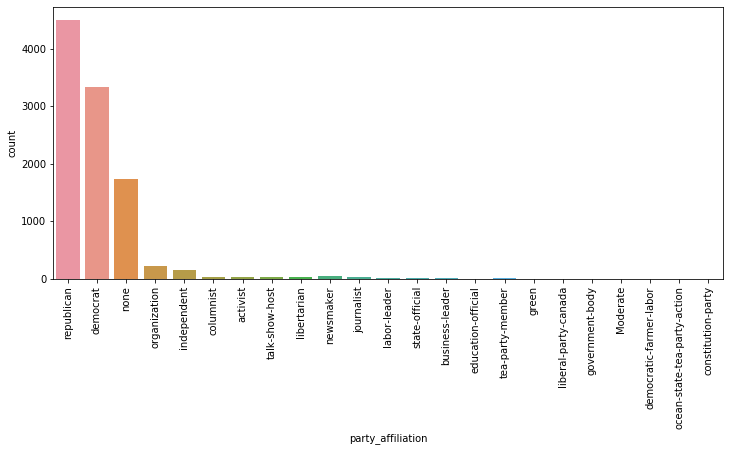

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x='party_affiliation', data=df)
plt.xticks(rotation='vertical')
plt.show()

#based on result missing is replaced by repulication
df['party_affiliation'].fillna("republican", inplace=True)



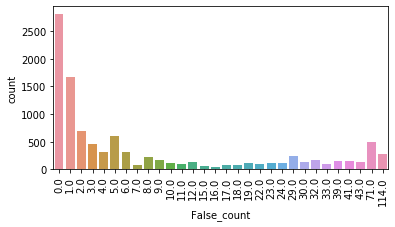

In [9]:
plt.figure(figsize=(6,3))
sns.countplot(x='False_count', data=df)
plt.xticks(rotation='vertical')
plt.show()


In [10]:
#Filling in missing values
df['speaker_job_title'].fillna("Others", inplace=True)
df['state_info'].fillna("Others", inplace=True)
df['Context(value/location)'].fillna("Others", inplace=True)
df['speaker'].fillna("none", inplace=True)
df['Barely_true_count'].fillna(0.0, inplace=True)
df['False_count'].fillna(0.0, inplace=True)
df['Half_true_count'].fillna(0.0, inplace=True)
df['Mostly_true_count'].fillna(0.0, inplace=True)
df['Fire_counts'].fillna(0.0, inplace=True)
df['subject_data'].fillna("none", inplace=True)


In [11]:
df.isnull().sum(axis=0)

Label                      0
statement                  0
subject_data               0
speaker                    0
speaker_job_title          0
state_info                 0
party_affiliation          0
Barely_true_count          0
False_count                0
Half_true_count            0
Mostly_true_count          0
Fire_counts                0
Context(value/location)    0
dtype: int64

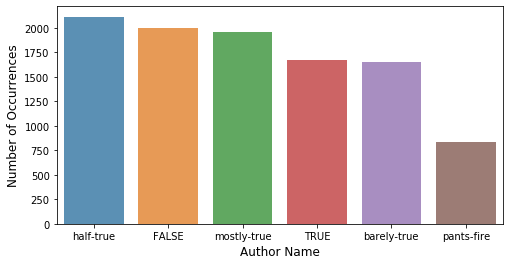

In [12]:
cnt_srs = df['Label'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

The dataset is balanced

In [56]:
#Labels=df['Label']
#from sklearn.preprocessing import OrdinalEncoder
#Labels = pd.DataFrame(OrdinalEncoder().fit_transform(Labels.to_numpy().reshape(-1,1)))
 #or

from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(df.Label.values)
df["party"] = lbl_enc.fit_transform(df.party_affiliation.values)
df["state"] = lbl_enc.fit_transform(df.state_info.values)
df["speaker_l"] = lbl_enc.fit_transform(df.speaker.values)

df.drop('Label', axis = 1, inplace = True)
df.drop('party_affiliation', axis = 1, inplace = True)
df.drop('state_info', axis = 1, inplace = True)
df.drop('speaker', axis = 1, inplace = True)


In [54]:
df

,statement,subject_data,speaker,speaker_job_title,state_info,party_affiliation,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location),party,state,speaker_l
0,say anni list polit group support third trimes...,abort,dwayne-bohac,state_representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,mailer,19,63,814
1,declin coal start start natur ga took start be...,energi_histori_job_accomplish,scott-surovell,state_delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,floor speech,5,70,2492
2,hillari clinton agre john mccain vote give geo...,foreign_polici,barack-obama,president,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,denver,5,19,182
3,health care reform legisl like mandat free sex...,health_care,blog-posting,others,Others,none,7.0,19.0,3.0,5.0,44.0,news releas,16,50,272
4,econom turnaround start end term,economi_job,charlie-crist,others,Florida,democrat,15.0,9.0,20.0,19.0,2.0,interview cnn,5,13,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,larger number shark attack florida case voter ...,anim_elect,aclu-florida,others,Florida,none,0.0,1.0,1.0,1.0,0.0,interview colbert report,16,13,12
10236,democrat becom parti atlanta metro area black,elect,alan-powell,others,Georgia,republican,0.0,0.0,0.0,1.0,0.0,interview,19,15,36
10237,say altern social secur oper galveston counti ...,retir_social_secur,herman-cain,others,Georgia,republican,4.0,11.0,5.0,3.0,3.0,republican presidenti debat,19,15,1108
10238,lift u cuban embargo allow travel cuba,florida_foreign_polici,jeff-greene,others,Florida,democrat,3.0,1.0,3.0,0.0,0.0,televis debat miami wplg kendrick meek,5,13,1243


In [14]:
y

array([0, 3, 4, ..., 3, 0, 5])

In [15]:
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#df = df.reset_index(drop=True)

def clean_text(temp):
    temp = temp.lower() # lowercase text
    temp = re.sub('[^a-zA-Z]',' ', temp)
    temp=temp.split( )
    temp= [stemmer.stem(word) for word in temp if word not in set(stopwords.words('english'))]
    temp= ' '.join(temp)
    return temp
df['statement'] = df['statement'].apply(clean_text)
df['subject_data'] = df['subject_data'].apply(clean_text)
df['Context(value/location)'] = df['Context(value/location)'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#merging state and job_title to one

def merge(temp):
    temp = temp.lower() # lowercase text
    temp = re.sub(' ','_', temp)
    return temp
df['speaker_job_title'] = df['speaker_job_title'].apply(merge)
df['subject_data'] = df['subject_data'].apply(merge)


In [17]:
 df.head()

,statement,subject_data,speaker,speaker_job_title,state_info,party_affiliation,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location)
0,say anni list polit group support third trimes...,abort,dwayne-bohac,state_representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,mailer
1,declin coal start start natur ga took start be...,energi_histori_job_accomplish,scott-surovell,state_delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,floor speech
2,hillari clinton agre john mccain vote give geo...,foreign_polici,barack-obama,president,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,denver
3,health care reform legisl like mandat free sex...,health_care,blog-posting,others,Others,none,7.0,19.0,3.0,5.0,44.0,news releas
4,econom turnaround start end term,economi_job,charlie-crist,others,Florida,democrat,15.0,9.0,20.0,19.0,2.0,interview cnn


TF-IDF vectorization

In [18]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv =TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_statement = cv.fit_transform(df["statement"]).toarray()
X_statement.shape
X_statement

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
cv.get_feature_names()[:20]

['abbott',
 'abel',
 'abil',
 'abl',
 'abolish',
 'abort',
 'abort even',
 'abort even case',
 'abort illeg',
 'abort right',
 'abraham',
 'abraham lincoln',
 'absolut',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'access health',
 'access health care']

In [20]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

# taking that array into dataframe


In [21]:
#taking that array into dataframe
X_df_statement = pd.DataFrame(X_statement, columns=cv.get_feature_names())

In [22]:
X_df_statement

,abbott,abel,abil,abl,abolish,abort,abort even,abort even case,abort illeg,abort right,abraham,abraham lincoln,absolut,abus,academ,academi,accept,access,access health,access health care,accid,accommod,accomplish,accord,accord recent,...,year tax,year term,year texa,year total,year weve,year year,yemen,yet,york,york citi,york state,york time,young,young adult,young peopl,your,your go,youth,youth unemploy,youv,youv got,zero,zero job,zika,zone
0,0.0,0.0,0.0,0.0,0.0,0.32659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10236,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10237,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10238,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#creating TFIDF for other features also
cv1 =TfidfVectorizer(max_features=500,ngram_range=(1,3))
X_subject_data = cv1.fit_transform(df["subject_data"]).toarray()
X_df_subject_data = pd.DataFrame(X_subject_data, columns=cv1.get_feature_names())


cv2 =TfidfVectorizer(max_features=500,ngram_range=(1,3))
X_Context = cv2.fit_transform(df["Context(value/location)"]).toarray()
X_df_Context = pd.DataFrame(X_Context, columns=cv2.get_feature_names())

In [24]:
X_df_subject_data.head()

,abort,abort_candid_biographi,abort_correct_updat,abort_health_care,abort_health_care_women,abort_messag_machin,abort_sexual,abort_women,afghanistan,afghanistan_militari,agricultur_feder_budget,agricultur_tax,alcohol,basebal,bipartisanship,bipartisanship_candid_biographi,bipartisanship_elect,bipartisanship_vote_record,bush_administr,campaign_advertis,campaign_financ,campaign_financ_candid_biographi,campaign_financ_elect,campaign_financ_energi,campaign_financ_ethic,...,stimulu,stimulu_tax,stimulu_transport,suprem_court,tax,tax_abc_news_week,tax_transpar,tax_transport,tax_vote_record,tax_water,technolog,terror,terror_transport,tourism,trade,transpar,transport,union,veteran,vote_record,water,weather,welfar,women,worker
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_df_Context.head()

,abc,abc news,abc week,abc week christian,action,ad,ad air,address,advertis,air,amanpour,america,american,american statesman,announc,appear,articl,associ,atlanta,attack,austin,austin american,austin american statesman,bay,beach,...,washington post,web,web ad,web page,web post,web site,web video,websit,websit post,websit statement,week,week christian,week christian amanpour,week georg,week georg stephanopoulo,weekli,white,white hous,women,wpri,written,york,york time,youtub,youtub video
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_df = pd.concat([X_df_statement, X_df_subject_data, X_df_Context], axis=1, sort=False)
X_df.shape

(10240, 6000)

In [27]:
X_df.isnull().sum(axis=0)

abbott          0
abel            0
abil            0
abl             0
abolish         0
               ..
written         0
york            0
york time       0
youtub          0
youtub video    0
Length: 6000, dtype: int64

In [28]:
## train test split
from sklearn.model_selection import train_test_split
steps = 25000
X_train,X_test,Y_train,Y_test = train_test_split(X_df, y, test_size=0.1,shuffle = True)

In [29]:
X_train.head()

,abbott,abel,abil,abl,abolish,abort,abort even,abort even case,abort illeg,abort right,abraham,abraham lincoln,absolut,abus,academ,academi,accept,access,access health,access health care,accid,accommod,accomplish,accord,accord recent,...,washington post,web,web ad,web page,web post,web site,web video,websit,websit post,websit statement,week,week christian,week christian amanpour,week georg,week georg stephanopoulo,weekli,white,white hous,women,wpri,written,york,york time,youtub,youtub video
3215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [51]:
model = MultinomialNB(alpha=0.9)
model.fit(X_train,Y_train )
pred = model.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.239


In [36]:
model.coef_[0]

array([-9.32623764, -8.90825962, -8.98779731, ..., -9.09963   ,
       -7.96344465, -8.2017326 ])

In [37]:
#top list of fake words used
feature_names = cv.get_feature_names()
sorted(zip(model.coef_[0], feature_names))[:5000]

[(-9.739303630593446, 'abort even'),
 (-9.739303630593446, 'abort even case'),
 (-9.739303630593446, 'abort illeg'),
 (-9.739303630593446, 'abort right'),
 (-9.739303630593446, 'abraham'),
 (-9.739303630593446, 'abraham lincoln'),
 (-9.739303630593446, 'academi'),
 (-9.739303630593446, 'accid'),
 (-9.739303630593446, 'accommod'),
 (-9.739303630593446, 'accord recent'),
 (-9.739303630593446, 'account percent'),
 (-9.739303630593446, 'acknowledg'),
 (-9.739303630593446, 'across state'),
 (-9.739303630593446, 'actual lower'),
 (-9.739303630593446, 'ad job'),
 (-9.739303630593446, 'adam'),
 (-9.739303630593446, 'administr spent'),
 (-9.739303630593446, 'admiss'),
 (-9.739303630593446, 'advertis'),
 (-9.739303630593446, 'african american men'),
 (-9.739303630593446, 'agenda'),
 (-9.739303630593446, 'ahead'),
 (-9.739303630593446, 'air forc one'),
 (-9.739303630593446, 'airplan'),
 (-9.739303630593446, 'alex sink support'),
 (-9.739303630593446, 'almost million'),
 (-9.739303630593446, 'alth

Count vectorization

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X1 = cv.fit_transform(df["statement"]).toarray()
X1.shape
X1_df = pd.DataFrame(X1, columns=cv.get_feature_names())
X_train,X_test,Y_train,Y_test = train_test_split(X1_df, y, test_size=0.1,shuffle = True)

In [39]:
model1 = MultinomialNB(alpha=0.9)
model1.fit(X_train,Y_train )
pred = model1.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.239


In [ ]:
## confusion matrix

from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,precision_recall_fscore_support
confMatrix = confusion_matrix(Y_test,Y_predict)
accuracy_noun = accuracy_score(Y_test,Y_predict)
precision_recall_fscore = precision_recall_fscore_support(Y_test,Y_predict)

print("[nouns] Accurracy {} Precision recall {} confusion matrix {} ".format(accuracy_noun,precision_recall_fscore,confMatrix))

In [42]:
# Print the confusion matrix
print(metrics.confusion_matrix(Y_test, pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, pred, digits=3))

[[47 26 40 45 44  6]
 [24 39 18 37 57  5]
 [28 13 31 34 38  8]
 [33 29 29 73 48  3]
 [27 25 20 56 48  6]
 [30  6 16 17 11  7]]
              precision    recall  f1-score   support

           0      0.249     0.226     0.237       208
           1      0.283     0.217     0.245       180
           2      0.201     0.204     0.203       152
           3      0.279     0.340     0.306       215
           4      0.195     0.264     0.224       182
           5      0.200     0.080     0.115        87

    accuracy                          0.239      1024
   macro avg      0.234     0.222     0.222      1024
weighted avg      0.240     0.239     0.235      1024



Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories. The kappa score measures the degree of agreement between the two evaluators (true values and the predicted values), which we use as the classifier’s performance.

Kappa score considers how much better the agreements are over and beyond chance agreements.It uses the expected proportion of chance agreements called ChanceAgree.

KappaScore=(Agree-ChanceAgree)/(1-ChanceAgree)



KAppa Cohen's:
According to Cohen's original article, values ≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.

In [44]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
cohen_kappa_score(Y_test, pred)

0.06905723045179601